In [76]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import time
#from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.cluster import KMeans
import numpy as np

In [77]:
# Prepare capture 2 and sample 1 
dataset_sample1 = pd.read_csv('./A sample 1 with renaming and classification done tcp only.csv' ,sep= ',')
dataset_sample1.head()

,No.,Time,Source,Destination,Protocol,Length,Info,Class
0,1,0.000000,Local,CDN,TCP,54,ACK,browsing
1,2,0.000231,CDN,Local,TCP,60,TCP ACKed unseen segment,browsing
2,3,0.255982,Local,CDN,TCP,54,ACK,browsing
3,4,0.256340,CDN,Local,TCP,60,TCP ACKed unseen segment,browsing
4,5,1.280050,Local,117.18.237.29,TCP,54,ACK,Unknown


In [78]:
# Prepare capture 2 and sample 1 
dataset_capture2 = pd.read_csv('./A capture 2 test with renaming and classification done tcp only.csv' ,sep= ',')
dataset_capture2.head()

,No.,Time,Source,Destination,Protocol,Length,Info,Class
0,8,0.061761,Google,Google,TLSv1.2,107,Application Data,browsing
1,9,0.061761,Google,Google,TCP,107,TCP Retransmission,browsing
2,10,0.061761,Google,Google,TCP,107,TCP Retransmission,browsing
3,11,0.061761,Google,Google,TCP,107,TCP Retransmission,browsing
4,12,0.061761,Google,Google,TCP,107,TCP Retransmission,browsing


In [79]:
df_sample1 =  dataset_sample1[['Source','Destination','Protocol','Length','Info','Class']]
df_sample1.columns

Index(['Source', 'Destination', 'Protocol', 'Length', 'Info', 'Class'], dtype='object')

In [80]:
df_capture2 =  dataset_capture2[['Source','Destination','Protocol','Length','Info','Class']]
df_capture2.head()

,Source,Destination,Protocol,Length,Info,Class
0,Google,Google,TLSv1.2,107,Application Data,browsing
1,Google,Google,TCP,107,TCP Retransmission,browsing
2,Google,Google,TCP,107,TCP Retransmission,browsing
3,Google,Google,TCP,107,TCP Retransmission,browsing
4,Google,Google,TCP,107,TCP Retransmission,browsing


In [81]:
# using label encoder to categories => training data set 
label_encoder = LabelEncoder()

for i in range(0,6):  # minus numerical values
    df_capture2.iloc[:,i] = label_encoder.fit_transform(df_capture2.iloc[:,i])

C:\Users\tanfe\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [82]:
df_capture2.head()

,Source,Destination,Protocol,Length,Info,Class
0,7,8,1,42,1,1
1,7,8,0,42,30,1
2,7,8,0,42,30,1
3,7,8,0,42,30,1
4,7,8,0,42,30,1


In [83]:
# testing data set 
for i in range(0,6):  # minus numerical values
    df_sample1.iloc[:,i] = label_encoder.fit_transform(df_sample1.iloc[:,i])

C:\Users\tanfe\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [84]:
df_sample1.head()

,Source,Destination,Protocol,Length,Info,Class
0,8,7,0,0,0,1
1,6,9,0,1,2,1
2,8,7,0,0,0,1
3,6,9,0,1,2,1
4,8,0,0,0,0,0


In [85]:
X_train = df_capture2.iloc[:,0:4]
y_train = df_capture2['Class']
X_test = df_sample1.iloc[:,0:4]
y_test = df_sample1['Class']
num_of_clusters = 2
# Train model
model_kmeans = KMeans(n_clusters=num_of_clusters, random_state=0)
model_kmeans.fit(X_train)

KMeans(n_clusters=2, random_state=0)

In [86]:
y_pred = model_kmeans.predict(X_test)

# Show results
print("Accuracy Score: " + str(accuracy_score(y_test, y_pred)))

Accuracy Score: 0.010432514670723756


In [87]:
print(y_pred)

[0 0 0 ... 0 0 0]


In [88]:
from collections import Counter
# Assuming y_pred is your prediction array or list
counter = Counter(y_pred)

# Print the count of each unique value in y_pred
print(counter)

Counter({0: 4601})


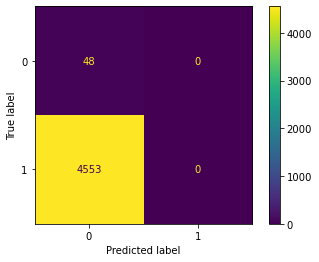

In [89]:
cm2 = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm2).plot()

In [90]:
kmeans = KMeans(n_clusters= 2)
clusters = kmeans.fit_predict(df_capture2)
print(clusters)

[0 0 0 ... 0 0 0]


In [91]:
x = df_capture2.values

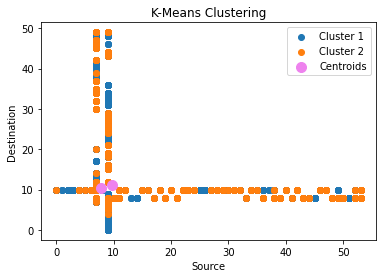

cluster 0 : [7 7 7 ... 0 9 9]
cluster 1 : [9 9 9 ... 6 9 9]


In [92]:
for i in np.unique(clusters):
    plt.scatter(x=x[clusters==i,0], y=x[clusters==i,1],
                label='Cluster ' + str(i + 1))
    
# plot the k mean centroid in the graph for the first and second column
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:,1],
            s=100,c='violet', label='Centroids')

# plot the 2d graph
plt.title('K-Means Clustering')
plt.xlabel(df_capture2.columns[0])
plt.ylabel(df_capture2.columns[1])
plt.legend()
plt.show()

for i in np.unique(clusters):
    print('cluster', i, ':', df_capture2.iloc[clusters==i, 0].values)

In [93]:
kmeans = KMeans(n_clusters= 2)
clusters2 = kmeans.fit_predict(df_sample1)
print(clusters2)
x = df_sample1.values

[0 0 0 ... 0 0 0]


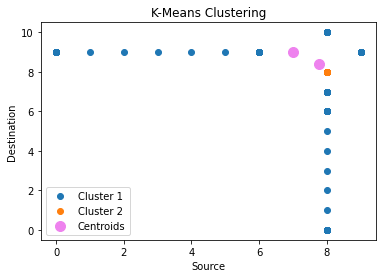

cluster 0 : [8 6 8 ... 7 7 8]
cluster 1 : [7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 8 8 8 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 8 8 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 8 8 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 8 8 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7

In [75]:
for i in np.unique(clusters2):
    plt.scatter(x=x[clusters2==i,0], y=x[clusters2==i,1],
                label='Cluster ' + str(i + 1))
    
# plot the k mean centroid in the graph for the first and second column
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:,1],
            s=100,c='violet', label='Centroids')

# plot the 2d graph
plt.title('K-Means Clustering')
plt.xlabel(df_sample1.columns[0])
plt.ylabel(df_sample1.columns[1])
plt.legend()
plt.show()

for i in np.unique(clusters2):
    print('cluster', i, ':', df_sample1.iloc[clusters2==i, 0].values)